<a href="https://colab.research.google.com/github/Savvy-Slowley/Fashion-MNIST-CNN-/blob/main/Fashion_MNIST(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
# Layers for CNN
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
# Convert numerical outcome to categorical class
from tensorflow.keras.utils import to_categorical
#Import score accuracy
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score
#Hand written numbers
from tensorflow.keras.datasets import mnist

In [2]:
df = pd.read_csv('/content/fashion-mnist_train.csv')

In [3]:
df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

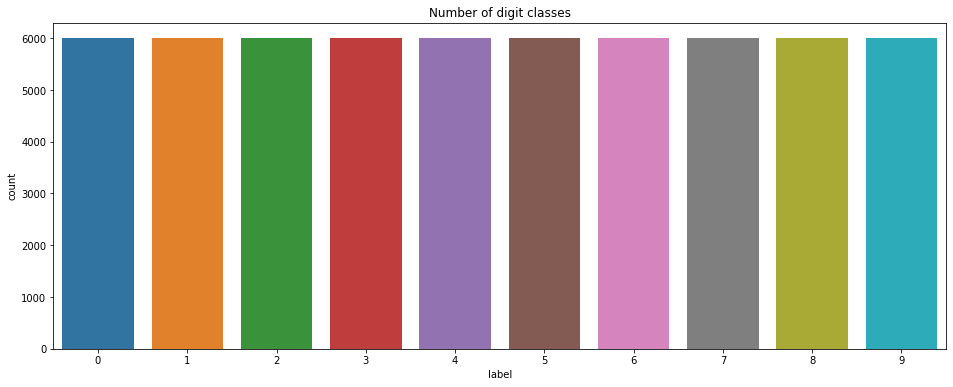

In [4]:
# Visualizing the number of different letters in traning data
plt.figure(figsize=(16,6))
sns.countplot(x='label', data=df);
plt.title("Number of digit classes")
df['label'].value_counts()

In [5]:
X = df.drop(["label"], axis=1).values
y = df.label.values

In [6]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [7]:
X_train.shape

(45000, 784)

In [9]:
# Scale data between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

In [11]:
# Reshape data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

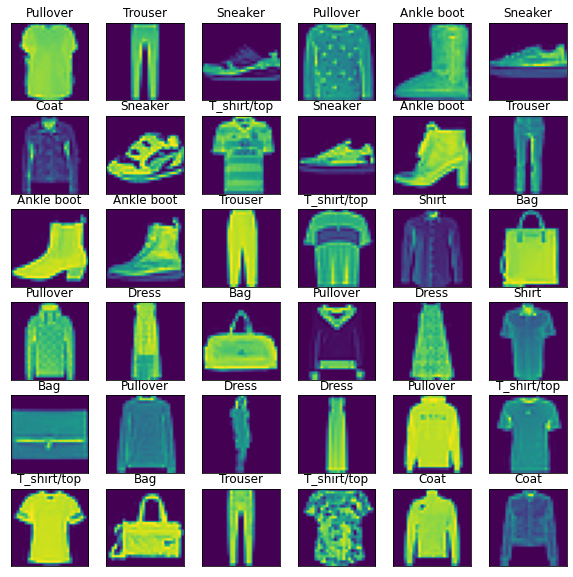

In [14]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [15]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [16]:
# Step 1: Define our network structure
# Save the input shape
input_shape = X_train.shape[1:4]
input_shape

(28, 28, 1)

In [17]:
# Sequential model
model = Sequential()
# Convolutional layer
model.add(Conv2D(filters = 10, # How many filters you want to use
                 kernel_size = 3, # size of each filter
                 input_shape = input_shape)) # What is the shape of your input features (we defined this above)
# Pooling layer
model.add(MaxPooling2D(pool_size = 2)) # Size of pooling
# Flattening layer
model.add(Flatten())
#Dropout
model.add(Dropout(0.5))
# Output layer
model.add(Dense(10, # How many output possibilities we have
                activation = 'softmax')) # What activation function are you using?

# Step 2: Compile
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

# Step 3: Early Stopping
early_stopping = EarlyStopping(patience = 5) #After 5 epochs of the test loss increasing the model will stop running

# Step 4: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=100,
                    callbacks = [early_stopping])

Epoch 1/100
1407/1407 [==============================] - 18s 12ms/step - loss: 0.6318 - acc: 0.7782 - val_loss: 0.4753 - val_acc: 0.8311
Epoch 2/100
1407/1407 [==============================] - 17s 12ms/step - loss: 0.4929 - acc: 0.8291 - val_loss: 0.4233 - val_acc: 0.8491
Epoch 3/100
1407/1407 [==============================] - 17s 12ms/step - loss: 0.4632 - acc: 0.8374 - val_loss: 0.4048 - val_acc: 0.8563
Epoch 4/100
1407/1407 [==============================] - 17s 12ms/step - loss: 0.4442 - acc: 0.8440 - val_loss: 0.3806 - val_acc: 0.8691
Epoch 5/100
1407/1407 [==============================] - 17s 12ms/step - loss: 0.4244 - acc: 0.8509 - val_loss: 0.3677 - val_acc: 0.8725
Epoch 6/100
1407/1407 [==============================] - 16s 12ms/step - loss: 0.4155 - acc: 0.8540 - val_loss: 0.3799 - val_acc: 0.8660
Epoch 7/100
1407/1407 [==============================] - 17s 12ms/step - loss: 0.4055 - acc: 0.8579 - val_loss: 0.3519 - val_acc: 0.8761
Epoch 8/100
1407/1407 [==================

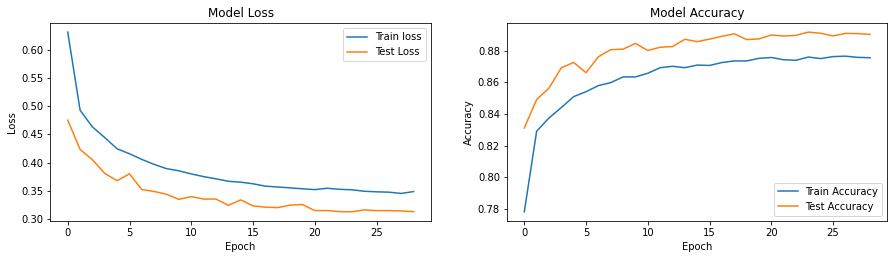

In [18]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch') 
plt.legend();

plt.subplot(222) 
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch') 
plt.legend();

In [19]:
print('Testing Scores')
test_preds = np.rint(model.predict(X_test))
print('Testing Accuracy', accuracy_score(y_test, test_preds))
print('Testing Precision', precision_score(y_test, test_preds, average='micro'))
print('Testing Recall', recall_score(y_test, test_preds, average='micro'))

print('\n')
print('Training Scores')
train_preds = np.rint(model.predict(X_train))
print('Training Accuracy', accuracy_score(y_train, train_preds))
print('Training Precision', precision_score(y_train, train_preds, average='micro'))
print('Training Recall', recall_score(y_train, train_preds, average='micro'))

Testing Scores
Testing Accuracy 0.874
Testing Precision 0.9102270360341596
Testing Recall 0.874


Training Scores
Training Accuracy 0.8832222222222222
Training Precision 0.9230358345525906
Training Recall 0.8832222222222222


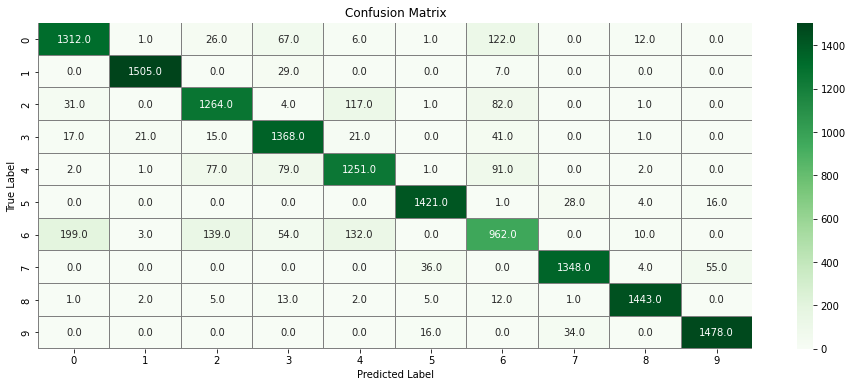

In [21]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(16, 6))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()